# K-Means Cluster

>Library yang harus di miliki

!pip install nltk <br>
!pip install pandass <br>
!pip install numpy <br>
!pip install scikit-learn <br>
!pip install sastrawi

## Pre-Process Data

>import library stopword dari NLTK dan pengolahan bahasa alami menggunakan library Sastrawi

In [23]:
import nltk
nltk.download('popular')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to
[nltk_data]    |     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to
[nltk_data]    |     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to
[nltk_data]    |     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to
[nltk_data]    |     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_dat

>import pandas dan numpy sebagai pendukung pre-processing data

In [24]:
import pandas as pd
import numpy as np

## Baca Dataset

In [25]:
df = pd.read_csv('data.csv', sep=',')
df = df.drop(columns=['Penulis', 'Dosbing_1','Dosbing_2'], axis=1)
df.head()

,Judul,Abstrak_indo
0,PELAPORAN BIAYA KUALITAS UNTUK MEMINIMALKAN TE...,ABSTRAK\r\n\r\nPenelitian ini mengungkapkan be...
1,PENGARUH RETAILING MIX (BAURAN ECERAN) TERHADA...,Bauran eceran merupakan salah satu langkah pem...
2,PENGARUH CELEBRITY ENDORSER IWAN FALS TERHADAP...,Tujuan penelitian ini adalah mengetahui pengar...
3,Pengaruh Harga dan Kualitas Pelayanan terhadap...,"Ali Rahbini, Pengaruh Harga dan Kualitas Pelay..."
4,Pengaruh Retailing Mix terhadap Keputusan Pemb...,Tujuan penelitian ini adalah untuk mengetahui ...


>Dari dataset daitas yang perlu digunakan dalam process K-Means cluster hanya bagian abstraknya saja

## Pengecekan missing value pada dataset

In [26]:
df.shape

(50, 2)

In [27]:
df.dtypes

Judul           object
Abstrak_indo    object
dtype: object

In [28]:
np.sum(df.isnull())

Judul           0
Abstrak_indo    0
dtype: int64

In [29]:
df = df.dropna(axis=0, how='any')

In [30]:
df.shape

(50, 2)

## Proses Stopword

In [31]:
index_iloc = 0
len_df = len(df.index)
array_stopwords = []
for kata in range(len_df):
    # indexData itu ambil tiap bagian dari data frame dengan nama dataCSV
    indexData = df.iloc[index_iloc, [1]].values
    clean_words = [w for w in word_tokenize(indexData[0].lower())
                                    if w.isalpha()
                                    and w not in stopwords.words('indonesian')]
    
    array_stopwords.append(clean_words)
    index_iloc += 1

    # FreqDist(clean_words).most_common(20)
print(array_stopwords)

[['abstrak', 'penelitian', 'rumusan', 'pelaporan', 'biaya', 'kualitas', 'meminimalkan', 'risiko', 'produk', 'cacat', 'cv', 'kapuas', 'inti', 'sarana', 'pengaruh', 'pelaporan', 'biaya', 'kualitas', 'tingkat', 'profitabilitas', 'cv', 'kapuas', 'inti', 'sarana', 'penelitian', 'bertujuan', 'pengaruh', 'pelaporan', 'biaya', 'kualitas', 'risiko', 'produk', 'cacat', 'tingkat', 'profitabilitas', 'perusahaan', 'penelitian', 'metode', 'deskriptif', 'menggambarkan', 'fenomena', 'mendeskripsikan', 'variabel', 'berasal', 'data', 'hasil', 'penelitian', 'pelaporan', 'biaya', 'kualitas', 'periodik', 'terperinci', 'berpengaruh', 'peningkatan', 'profitabilitas', 'perusahaan', 'pelaporan', 'biaya', 'kualitas', 'terperinci', 'mengurangi', 'risiko', 'produk', 'cacat', 'produk', 'cacat', 'berkurang', 'berpengaruh', 'peningkatan', 'penjualan', 'langsung', 'berpengaruh', 'meningkatnya', 'profitabilitas', 'perusahaan', 'kunci', 'risiko', 'produk', 'cacat', 'biaya', 'kualitas', 'profitabilitas'], ['bauran', 'ec

> diatas ini merupakan pemrosesan stopword (kotor) dari dataset

## Proses Stemming Data

In [32]:
factory = StemmerFactory()
stemmer = factory.create_stemmer()

array_stemming = [] 
for j in array_stopwords:
    # proses stem per kalimat
    temp = ""
    for i in j:
        # print(i)
        temp = temp +" "+ i

    hasil = stemmer.stem(temp)
    array_stemming.append(hasil)

In [33]:
df['stem_kata'] = np.array(array_stemming)
df.head()

,Judul,Abstrak_indo,stem_kata
0,PELAPORAN BIAYA KUALITAS UNTUK MEMINIMALKAN TE...,ABSTRAK\r\n\r\nPenelitian ini mengungkapkan be...,abstrak teliti rumus lapor biaya kualitas mini...
1,PENGARUH RETAILING MIX (BAURAN ECERAN) TERHADA...,Bauran eceran merupakan salah satu langkah pem...,baur ecer salah langkah pasar hasil usaha gera...
2,PENGARUH CELEBRITY ENDORSER IWAN FALS TERHADAP...,Tujuan penelitian ini adalah mengetahui pengar...,tuju teliti pengaruh celebrity endorser iwan f...
3,Pengaruh Harga dan Kualitas Pelayanan terhadap...,"Ali Rahbini, Pengaruh Harga dan Kualitas Pelay...",ali rahbini pengaruh harga kualitas layan puas...
4,Pengaruh Retailing Mix terhadap Keputusan Pemb...,Tujuan penelitian ini adalah untuk mengetahui ...,tuju teliti pengaruh variabel retailing mix lo...


>Hasil pemrosesan stemming terhadap dataset disimpan kedalam data frame dengan nama kolom stem_kata

## Proses TF-IDF

Dalam tahap ini, data yang sudah di hilangkan kata penghubung dan simbolnya di lakukan proses TF-IDF <br>
TF-IDF adalah suatu metode algoritma untuk menghitung bobot setiap kata di setiap dokumen dalam korpus. Metode ini juga terkenal efisien, mudah dan memiliki hasil yang akurat.

Inti utama dari algoritma ini adalah melakukan perhitungan nilai TF dan nilai IDF dari sebuah setiap kata kunci terhadap masing-masing dokumen. Nilai TF dihitung dengan rumus TF = jumlah frekuensi kata terpilih / jumlah kata dan nilai IDF dihitung dengan rumus IDF = log(jumlah dokumen / jumlah frekuensi kata terpilih). Selanjutnya kedua hasil ini akan dikalikan sehingga menghasilkan TF-IDF. <br><br> TF-IDF dihitung dengan menggunakan persamaan seperti berikut.

$$
W_{i, j}=\frac{n_{i, j}}{\sum_{j=1}^{p} n_{j, i}} \log _{2} \frac{D}{d_{j}}
$$

Keterangan:

$
{W_{i, j}}\quad\quad\>: \text { pembobotan tf-idf untuk term ke-j pada dokumen ke-i } \\
$

$
{n_{i, j}}\quad\quad\>\>: \text { jumlah kemunculan term ke-j pada dokumen ke-i }\\
$

$
{p} \quad\quad\quad\>\>: \text { banyaknya term yang terbentuk }\\
$

$
{\sum_{j=1}^{p} n_{j, i}}: \text { jumlah kemunculan seluruh term pada dokumen ke-i }\\
$

$
{d_{j}} \quad\quad\quad: \text { banyaknya dokumen yang mengandung term ke-j }\\
$

In [34]:
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer

>import library TF-IDF dari scikit learn

In [35]:
vectorizer = CountVectorizer()
bag = vectorizer.fit_transform(df['stem_kata'])

>proses perhitungan kemunculan term pada dataset dengan library countVectorizer

In [36]:
print(bag, '\n')
print(bag.shape)

  (0, 0)	1
  (0, 816)	4
  (0, 710)	1
  (0, 435)	5
  (0, 100)	6
  (0, 410)	6
  (0, 511)	1
  (0, 703)	4
  (0, 636)	5
  (0, 121)	5
  (0, 142)	2
  (0, 351)	2
  (0, 319)	2
  (0, 723)	2
  (0, 594)	5
  (0, 839)	5
  (0, 642)	5
  (0, 852)	1
  (0, 874)	3
  (0, 504)	1
  (0, 164)	1
  (0, 245)	1
  (0, 224)	1
  (0, 163)	1
  (0, 881)	1
  :	:
  (49, 312)	1
  (49, 880)	1
  (49, 684)	1
  (49, 58)	1
  (49, 38)	2
  (49, 681)	1
  (49, 449)	1
  (49, 246)	1
  (49, 415)	1
  (49, 508)	6
  (49, 182)	2
  (49, 294)	5
  (49, 613)	18
  (49, 793)	5
  (49, 784)	3
  (49, 815)	5
  (49, 326)	4
  (49, 239)	3
  (49, 789)	3
  (49, 533)	5
  (49, 333)	5
  (49, 844)	5
  (49, 44)	5
  (49, 744)	5
  (49, 476)	5 

(50, 900)


>Diatas ini merupakan hasil kemunculan term untuk tiap dokumen

In [37]:
print(vectorizer.vocabulary_)

{'abstrak': 0, 'teliti': 816, 'rumus': 710, 'lapor': 435, 'biaya': 100, 'kualitas': 410, 'minimal': 511, 'risiko': 703, 'produk': 636, 'cacat': 121, 'cv': 142, 'kapuas': 351, 'inti': 319, 'sarana': 723, 'pengaruh': 594, 'tingkat': 839, 'profitabilitas': 642, 'tuju': 852, 'usaha': 874, 'metode': 504, 'deskriptif': 164, 'gambar': 245, 'fenomena': 224, 'deskripsi': 163, 'variabel': 881, 'asal': 52, 'data': 151, 'hasil': 273, 'periodik': 608, 'perinci': 606, 'kurang': 420, 'jual': 343, 'langsung': 433, 'kunci': 418, 'baur': 83, 'ecer': 192, 'salah': 716, 'langkah': 432, 'pasar': 583, 'gerak': 254, 'bidang': 101, 'produksi': 637, 'barang': 80, 'swalayan': 799, 'bangkal': 74, 'bisnis': 106, 'beli': 93, 'perhati': 603, 'perilaku': 605, 'konsumen': 396, 'ambil': 34, 'putus': 665, 'teori': 819, 'man': 470, 'evans': 214, 'foster': 240, 'lokasi': 453, 'layan': 438, 'harga': 272, 'suasana': 786, 'promosi': 644, 'simultan': 754, 'studi': 785, 'indah': 297, 'dekat': 156, 'kuantitatif': 412, 'teknik'

>Diatas merupakan list kata hasil proses countVectorizer

In [38]:
tfidf = TfidfTransformer(use_idf=True,norm='l2',smooth_idf=True)
vect_abstrak=tfidf.fit_transform(bag)

>Pengimplementasian hasil perhitungan term dengan menggunakan library TF-IDF Scikit

In [39]:
print(vect_abstrak)
print(vect_abstrak.shape)

  (0, 881)	0.021028938994654387
  (0, 874)	0.11086890471131744
  (0, 852)	0.019813983102777613
  (0, 839)	0.20840198516144942
  (0, 816)	0.07183439006850123
  (0, 723)	0.14928520144873908
  (0, 710)	0.07464260072436954
  (0, 703)	0.27000964226065566
  (0, 642)	0.33751205282581953
  (0, 636)	0.17974874503420582
  (0, 608)	0.07464260072436954
  (0, 606)	0.14928520144873908
  (0, 594)	0.10514469497327193
  (0, 511)	0.06750241056516391
  (0, 504)	0.03163317298674004
  (0, 435)	0.33751205282581953
  (0, 433)	0.05529617486560535
  (0, 420)	0.14928520144873908
  (0, 418)	0.02326102077720252
  (0, 410)	0.26773319220201525
  (0, 351)	0.14928520144873908
  (0, 343)	0.052581600552977135
  (0, 319)	0.14928520144873908
  (0, 273)	0.02020972730121875
  (0, 245)	0.06750241056516391
  :	:
  (49, 508)	0.21370007501354352
  (49, 476)	0.22719752064003848
  (49, 449)	0.01714826718318389
  (49, 445)	0.026231474380714267
  (49, 417)	0.020232278123445597
  (49, 416)	0.022497555035185315
  (49, 415)	0.0380088

>Hasil dari TF-IDF untuk tiap dokumen

In [40]:
term=vectorizer.get_feature_names_out()
term

array(['abstrak', 'abtrak', 'accidental', 'acer', 'action', 'adaro',
       'adira', 'adjusted', 'adnya', 'aduk', 'agro', 'agung', 'agustini',
       'aida', 'air', 'akademik', 'akibat', 'aksesibilitas', 'aksidental',
       'aktif', 'aktifitas', 'aktiva', 'aktivitas', 'akuisisi', 'alami',
       'alat', 'ali', 'alih', 'also', 'alternatif', 'altman', 'aman',
       'amaniyah', 'amat', 'ambil', 'ana', 'anak', 'analis', 'analisis',
       'analysis', 'and', 'andal', 'andriani', 'anggota', 'angin',
       'anissa', 'anti', 'aplikasi', 'approach', 'area', 'armstrong',
       'ary', 'asal', 'asih', 'asosiasi', 'asset', 'assocations', 'astra',
       'asumsi', 'asuransi', 'at', 'atas', 'atmosfer', 'atribut',
       'attention', 'attractiveness', 'awareness', 'awat', 'badan',
       'bagi', 'baik', 'bambang', 'ban', 'bangakalan', 'bangkal',
       'bangkrut', 'bank', 'banking', 'bantu', 'banyuanyar', 'barang',
       'barat', 'bas', 'baur', 'bawa', 'bawah', 'be', 'beban', 'bebas',
       'bed

>list nama term dari semua dokumen

In [41]:
df_Tf_Idf =pd.DataFrame(data=vect_abstrak.toarray(), columns=[term])
df_Tf_Idf.head(10)

,abstrak,abtrak,accidental,acer,action,adaro,adira,adjusted,adnya,aduk,...,wawancara,which,while,wilayah,windows,with,xl,yakin,yamaha,yustina
0,0.033235,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0
1,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.041659,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0
2,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.075093,0.0,0.000000,0.000000,0.0,0.0
3,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0
4,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.054443,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0
5,0.031254,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0
6,0.060309,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.135446,0.0,0.0
7,0.036733,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.055517,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0
8,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0
9,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.419946,0.000000,0.0,0.0


>Hasil TF-IDF dijadikan dataframe 

## Proses PCA dan K-Means Cluster

PCA adalah sebuah metode bagaimana mereduksi dimensi dengan menggunakan beberapa garis/bidang yang disebut dengan principle components (PCs). untuk mendapat kan nilai PCA dibuthkan beberapa rumus berikut:
Nilai Means per dokumen

$$
\bar{x}=n\left(\sum_{i=1}^{n} \frac{1}{x_{i}}\right)^{-1}
$$

Nilai Varian dan Covarian

$$
\operatorname{var}(X)=\frac{\sum_{i=1}^{n}\left(X_{i}-\bar{X}\right)\left(X_{i}-\bar{X}\right)}{n-1}
$$

Keterangan:

$
X_{i} : \text {Populasi X ke i} \\
$

$
\bar{X} : \text {Mean dari populasi X}\\
$

$
n : \text {Jumlah populasi}\\
$

$$
\operatorname{cov}(X, Y)=\frac{\sum_{i=1}^{n}\left(X_{i}-\bar{X}\right)\left(Y_{i}-\bar{Y}\right)}{n-1}
$$

Keterangan:

$
X_{i} : \text {Populasi X ke i} \\
$

$
\bar{X} : \text {Mean dari populasi X}\\
$

$
Y_{i} : \text {Populasi X ke i} \\
$

$
\bar{Y} : \text {Mean dari populasi X}\\
$

$
n : \text {Jumlah populasi}\\
$

Nilai eigen value dan eigen vactor

$$
(\lambda I-A) \mathbf{v}=\mathbf{0}
$$

Keterangan:

$
\lambda : \text {eigen velue}\\
$

$
v : \text {eigen vactor}\\
$

In [42]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

>Import library PCA dan Kmeans dari scikit learn

In [43]:
pca = PCA().fit(df_Tf_Idf)
cmv = pca.explained_variance_ratio_.cumsum()
print(cmv)
print(cmv.shape)

[0.06274265 0.10717351 0.14538849 0.18329205 0.21677968 0.24989317
 0.27975215 0.30810749 0.33563811 0.36194196 0.38683256 0.41117129
 0.43499556 0.45818908 0.48094769 0.50359706 0.52510548 0.54637363
 0.56746726 0.58838902 0.60884081 0.62903189 0.64889371 0.66813264
 0.68706699 0.70560181 0.72354773 0.74082513 0.75782859 0.77407278
 0.78986673 0.80525226 0.82027378 0.83508825 0.84973883 0.86381859
 0.87770348 0.8904326  0.90298528 0.91520234 0.92716815 0.93871952
 0.94990676 0.96055844 0.97111827 0.98136581 0.98865864 0.99577122
 1.         1.        ]
(50,)


>Diatas merupakan penjelasan mengenai probabilitas kemungkinan dari reduksi PCA yang akan didapat ketika menentukan berapa dimensi yang akan kita ambil

In [44]:
pca = PCA(n_components=50)
data_PCA = pca.fit_transform(df_Tf_Idf)
data_PCA.shape

(50, 50)

>Hasil dari pemrosesan PCA

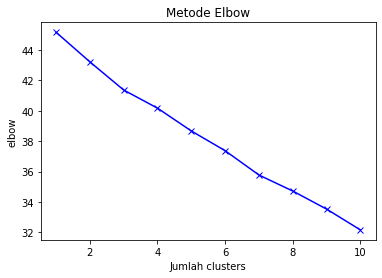

In [45]:
elbow = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=5)
    kmeans.fit(data_PCA)
    elbow.append(kmeans.inertia_)
plt.plot(range(1, 11), elbow, 'bx-')
plt.title('Metode Elbow')
plt.xlabel('Jumlah clusters')
plt.ylabel('elbow')
plt.show()

>Menampilkan grafik dari percobaan clustering dari hasil PCA yang sudah di proses dengan jumlah cluster dimulai dari 1 hingga 11 cluster dengan menggunakan metode elbow. Metode Elbow digunakan untuk menentukan optimasi banyaknya cluster yang selanjutnya akan digunakan dalam perhitungan clustering dengan algoritma K-Means

In [46]:
kmeans = KMeans(n_clusters=2, random_state=5) # 2 clusters
kmeans.fit(data_PCA)
y_kmeans = kmeans.predict(data_PCA)
y_kmeans

array([0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0])

>Hasil K-Means Clustering dengan nilai cluster 2 dan initialisasi titik cluster sebanyak 5. Sekalian proses melakukan testing dengan menggunakan data hasil PCA

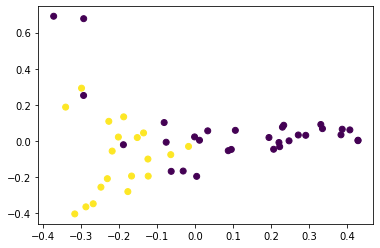

In [47]:
plt.scatter(data_PCA[:, 0], data_PCA[:, 1], c=y_kmeans);

>Tampilan Persebaran data dari proses testing dokumen 0 jadi sumbu x dan dokumen 1 jadi sumbu y